In [1]:
#some example of output from model and some result
import xarray as xr
import matplotlib
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as func
import numpy as np
import cv2

In [3]:
from mpl_toolkits.basemap import maskoceans

In [4]:
levels = {}
levels["crps"]   = [0,0.2,0.4,0.6,0.8,1.0] 
levels["crpss"]   = [-0.8,-0.4,-0.2,0,0.2,0.4,0.8] 
#levels["crps"]=[0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]
levels["new"]   = [0, 0.1, 1.0 ,5.0, 10.0, 20.0, 30.0, 40.0, 60.0 ,100, 150] 
levels["mae"]   = [0, 0.5, 1 ,1.5, 2, 2.5, 3, 4, 6 ,8, 10] 
levels["hour"]  = [0., 0.2, 1, 5,  10,  20,  30,   40,   60,   80,  100,  150]
levels["day"]   = [0., 0.2, 5, 10,  20,  30,  40,  60,  100,  150,  200,  300]
levels["week"]  = [0., 0.2, 10,  20,  30,  50, 100,  150,  200,  300,  500, 1000]
levels["month"] = [0., 10, 20,  30,  40,  50, 100,  200,  300,  500, 1000, 1500]
levels["year"]  = [0., 50, 100, 200, 300, 400, 600, 1000, 1500, 2000, 3000, 5000]
enum={0:"0600",1:"1200",2:"1800",3:"0000",4:"0600"}

prcp_colours = [
                   "#FFFFFF", 
                   '#edf8b1',
                   '#c7e9b4',
                   '#7fcdbb',
                   '#41b6c4',
                   '#1d91c0',
                   '#225ea8',
                   '#253494',
                   '#4B0082',
                   "#800080",
                   '#8B0000']

prcp_colormap = matplotlib.colors.ListedColormap(prcp_colours)

def draw_aus(var,lat,lon,domain = [111.975, 156.275, -44.525, -9.975], mode="crps-ss" , titles_on = True, \
             title = "CRPS of precipation in 2012", colormap = prcp_colormap, cmap_label = "CRPS-ss",save=False,path=""):
    """ basema_ploting .py
This function takes a 2D data set of a variable from AWAP and maps the data on miller projection. 
The map default span is longitude between 111.975E and 156.275E, and the span for latitudes is -44.525 to -9.975. 
The colour scale is YlGnBu at 11 levels. 
The levels specifed are suitable for annual rainfall totals for Australia. 
"""
    from matplotlib.colors import ListedColormap, BoundaryNorm
    from mpl_toolkits.basemap import Basemap,maskoceans
    
    if mode == "pr":
        level = 'new'
    
    # crps-ss
    if mode == "crps-ss":
        level = "crpss"
             
    if mode == "crps":
        level = "crps"  
    
    fig=plt.figure()
    level=levels[level]
#   Basemap reference https://wizardforcel.gitbooks.io/matplotlib-intro-tut/content/matplotlib/27.html
    map = Basemap(projection = "mill", llcrnrlon = domain[0], llcrnrlat = domain[2], urcrnrlon = domain[1],\
                  urcrnrlat = domain[3], resolution = 'l')
    map.drawcoastlines()
    #map.drawmapboundary()
    #map.drawparallels(np.arange(-90., 120., 5.),labels=[1,0,0,0])
    #map.drawmeridians(np.arange(-180.,180., 5.),labels=[0,0,0,1])
    llons, llats = np.meshgrid(lon, lat) # 将维度按照 x,y 横向竖向
   # print(lon.shape,llons.shape)
    x,y = map(llons,llats)
   # print(x.shape,y.shape)
    
    norm = BoundaryNorm(level, len(level)-1)
    
    # red square
    #var[255:260,205:510]= 1000
    #var[495:500,210:510]= 1000
    #var[260:500,205:210]= 1000
    #var[260:500,505:510]= 1000
    
    data=xr.DataArray(var,coords=[lat,lon],dims=["lat","lon"])
    
    # pr
    if mode == "pr":
        cs = map.pcolormesh(x, y, data, norm = norm, cmap = colormap) 
    
    # crps-ss
    if mode == "crps-ss":
        cs = map.pcolormesh(x, y, data, cmap="RdBu",vmin=-0.8,vmax=0.8) 
        
    if mode == "mae":
        cs = map.pcolormesh(x, y, data, norm = norm, cmap = colormap) 
    
    if titles_on:
        # label with title, latitude, longitude, and colormap
        
        plt.title(title)
        #plt.xlabel("\n\nLongitude")
        #plt.ylabel("Latitude\n\n")
        
        # color bar
        cbar = plt.colorbar(ticks = level[:-1], shrink = 0.8, extend = "max")#shrink = 0.8
        cbar.ax.set_ylabel(cmap_label)
        
        #cbar.ax.set_xticklabels(level) #报错
    
    # plt.plot([-1000,1000],[900,1000], c="b", linewidth=2, linestyle=':')
    
    if save:
        plt.savefig(path)
    else:
        plt.show()
    plt.cla()
    plt.close("all")
    return


def draw_aus_pr(var,lat,lon,domain = [140.6, 153.9, -39.2, -18.6], mode="pr" , titles_on = True,\
                title = " precipation in 2012", colormap = prcp_colormap, cmap_label = "PR",save=False,path=""):
    """ basema_ploting .py
This function takes a 2D data set of a variable from AWAP and maps the data on miller projection. 
The map default span is longitude between 111.975E and 156.275E, and the span for latitudes is -44.525 to -9.975. 
The colour scale is YlGnBu at 11 levels. 
The levels specifed are suitable for annual rainfall totals for Australia. 
"""
    from matplotlib.colors import ListedColormap, BoundaryNorm
    from mpl_toolkits.basemap import Basemap,maskoceans
    
    if mode == "pr":
        level = 'new'
    
    # crps-ss
    if mode == "crps-ss":
        level = "crpss"
             
    if mode == "crps":
        level = "crps"  
    
    fig=plt.figure()
    level=levels[level]
    map = Basemap(projection = "mill", llcrnrlon = domain[0], llcrnrlat = domain[2], urcrnrlon = domain[1],\
                  urcrnrlat = domain[3], resolution = 'l')
    map.drawcoastlines()
    #map.drawmapboundary()
    map.drawparallels(np.arange(-90., 120., 5.),labels=[1,0,0,0])
    map.drawmeridians(np.arange(-180.,180., 5.),labels=[0,0,0,1],rotation = 45)
    llons, llats = np.meshgrid(lon, lat) # 将维度按照 x,y 横向竖向
#     print(lon.shape,llons.shape)
    x,y = map(llons,llats)
    print(x.shape,y.shape)
    
    norm = BoundaryNorm(level, len(level)-1)
    
    # red square
    #var[255:260,205:510]= 1000
    #var[495:500,210:510]= 1000
    #var[260:500,205:210]= 1000
    #var[260:500,505:510]= 1000
    
    data=xr.DataArray(var,coords=[lat,lon],dims=["lat","lon"])
    
    # pr
    if mode == "pr":
        cs = map.pcolormesh(x, y, data, norm = norm, cmap = colormap) 
    
    # crps-ss
    if mode == "crps-ss":
        cs = map.pcolormesh(x, y, data, cmap="RdBu",vmin=-0.8,vmax=0.8) 
        
    if mode == "mae":
        cs = map.pcolormesh(x, y, data, norm = norm, cmap = colormap) 
    
    if titles_on:
        # label with title, latitude, longitude, and colormap
        
        plt.title(title)
#         x = [115, 120, 125, 130, 135, 140, 145, 150, 155]
#         x_label = ['115E', '120E', '125E', '130E', '135E', '140E', '145E', '150E','155E']
#         plt.xticks(x, x_label, rotation ='vertical')
        plt.xlabel("\n\n\nLongitude")
        plt.ylabel("Latitude\n\n")
        
        # color bar
        cbar = plt.colorbar(ticks = level[:-1], shrink = 0.8, extend = "max")#shrink = 0.8
        cbar.ax.set_ylabel(cmap_label)
        
        #cbar.ax.set_xticklabels(level) #报错
    
    # plt.plot([-1000,1000],[900,1000], c="b", linewidth=2, linestyle=':')
    
    if save:
        plt.savefig(path, bbox_inches = 'tight', dpi=300)
    else:
        plt.show()
    plt.cla()
    plt.close("all")
    return

(413, 267) (413, 267)


/scratch/zv2/yl3101/tmp/ipykernel_307206/1326245619.py:155: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cs = map.pcolormesh(x, y, data, norm = norm, cmap = colormap)


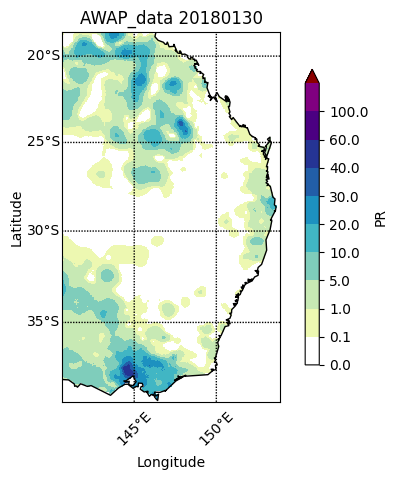

In [12]:
path = "/scratch/iu60/yl3101/AGCD_mask_data/2018-01-30.nc"
data = xr.open_dataset(path)
data = data.fillna(0)
result = data.isel(time=0)['precip'].values
lat = data.lat.values
lon = data.lon.values
draw_aus_pr(result,lat=lat,lon=lon, title = "AWAP_data 20180130",save=False, \
                path="./comparison/20180130/AWAP_20180130.jpeg")

In [16]:
path = "/scratch/iu60/yl3101/Processed_data/e05/da_pr_20180130_e05.nc"
data = xr.open_dataset(path)
data = data.fillna(0)
result = data.isel(time=0)['pr'].values * 86000
lat = data.lat.values
lon = data.lon.values
draw_aus_pr(result,lat=lat,lon=lon, title = "ACCESS-S2 20180130e05",save=True, \
                path="./comparison/20180130/ACCESS_20180130e05.jpeg")

(57, 24) (57, 24)


/scratch/zv2/yl3101/tmp/ipykernel_307206/1326245619.py:155: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cs = map.pcolormesh(x, y, data, norm = norm, cmap = colormap)


In [17]:
path = "/scratch/iu60/yl3101/DESRGAN/vdynamic_weights/2018/model_G_i000008/e05/2018-01-30_e05.nc"
data = xr.open_dataset(path)
data = data.fillna(0)
result = data.isel(time=0)['pr'].values
lat = data.lat.values
lon = data.lon.values
draw_aus_pr(result,lat=lat,lon=lon, title = "PEFGAN 20180130e05",save=True, \
                path="./comparison/20180130/PEFGAN_20180130e05.jpeg")

(413, 267) (413, 267)


/scratch/zv2/yl3101/tmp/ipykernel_307206/1326245619.py:155: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cs = map.pcolormesh(x, y, data, norm = norm, cmap = colormap)


In [18]:
path = "/scratch/iu60/yl3101/DESRGAN/vOriginal_DESRGAN/2018/model_G_i000004/e05/2018-01-30_e05.nc"
data = xr.open_dataset(path)
data = data.fillna(0)
result = data.isel(time=0)['pr'].values
lat = data.lat.values
lon = data.lon.values
draw_aus_pr(result,lat=lat,lon=lon, title = "DESRGAN 20180130e05",save=True, \
                path="./comparison/20180130/DESRGAN_20180130e05.jpeg")

(413, 267) (413, 267)


/scratch/zv2/yl3101/tmp/ipykernel_307206/1326245619.py:155: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cs = map.pcolormesh(x, y, data, norm = norm, cmap = colormap)


(413, 267) (413, 267)


/scratch/zv2/yl3101/tmp/ipykernel_1443283/1803124947.py:155: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cs = map.pcolormesh(x, y, data, norm = norm, cmap = colormap)


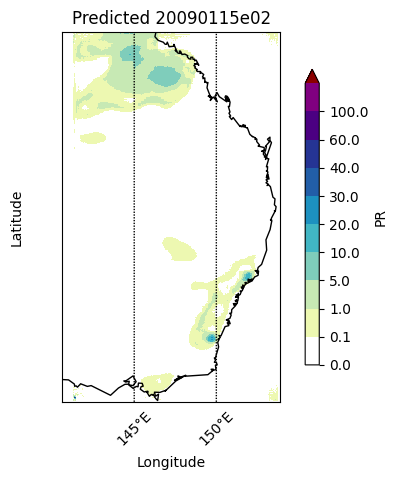

In [14]:
path = "/scratch/iu60/yl3101/DESRGAN/model_G_i000001/e02/2009-01-15_e02.nc"
data = xr.open_dataset(path)
data = data.fillna(0)
result = data.isel(time=0)['pr'].values
lat = data.lat.values
lon = data.lon.values
draw_aus_pr(result,lat=lat,lon=lon, title = "Predicted 20090115e02",save=False, \
                path="./comparison/20090101/AWAP_data/AWAP_20090101.jpeg")

(413, 267) (413, 267)


/scratch/zv2/yl3101/tmp/ipykernel_1443283/1803124947.py:155: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cs = map.pcolormesh(x, y, data, norm = norm, cmap = colormap)


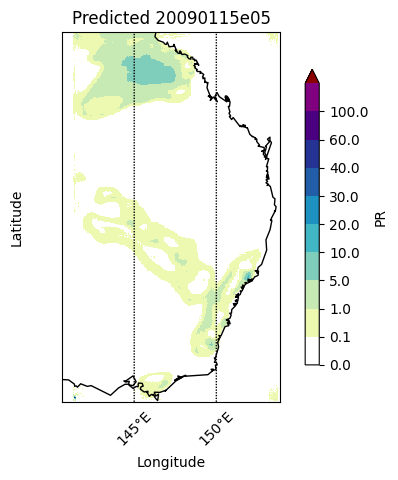

In [15]:
path = "/scratch/iu60/yl3101/DESRGAN/model_G_i000001/e05/2009-01-15_e05.nc"
data = xr.open_dataset(path)
data = data.fillna(0)
result = data.isel(time=0)['pr'].values
lat = data.lat.values
lon = data.lon.values
draw_aus_pr(result,lat=lat,lon=lon, title = "Predicted 20090115e05",save=False, \
                path="./comparison/20090101/AWAP_data/AWAP_20090101.jpeg")

(413, 267) (413, 267)


/scratch/zv2/yl3101/tmp/ipykernel_1443283/1803124947.py:155: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cs = map.pcolormesh(x, y, data, norm = norm, cmap = colormap)


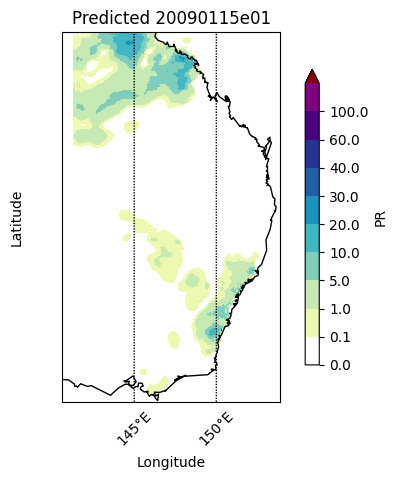

In [17]:
path = "/scratch/iu60/yl3101/DESRGAN/model_G_i000004/e01/2009-01-15_e01.nc"
data = xr.open_dataset(path)
data = data.fillna(0)
result = data.isel(time=0)['pr'].values
lat = data.lat.values
lon = data.lon.values
draw_aus_pr(result,lat=lat,lon=lon, title = "Predicted 20090115e01",save=False, \
                path="./comparison/20090101/AWAP_data/AWAP_20090101.jpeg")

(413, 267) (413, 267)


/scratch/zv2/yl3101/tmp/ipykernel_1443283/1803124947.py:155: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cs = map.pcolormesh(x, y, data, norm = norm, cmap = colormap)


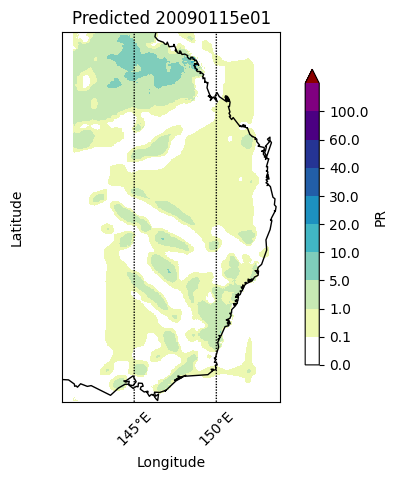

In [16]:
path = "/scratch/iu60/yl3101/DESRGAN/model_G_i000005/e01/2009-01-15_e01.nc"
data = xr.open_dataset(path)
data = data.fillna(0)
result = data.isel(time=0)['pr'].values
lat = data.lat.values
lon = data.lon.values
draw_aus_pr(result,lat=lat,lon=lon, title = "Predicted 20090115e01",save=False, \
                path="./comparison/20090101/AWAP_data/AWAP_20090101.jpeg")

(413, 267) (413, 267)


/scratch/zv2/yl3101/tmp/ipykernel_1443283/1803124947.py:155: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cs = map.pcolormesh(x, y, data, norm = norm, cmap = colormap)


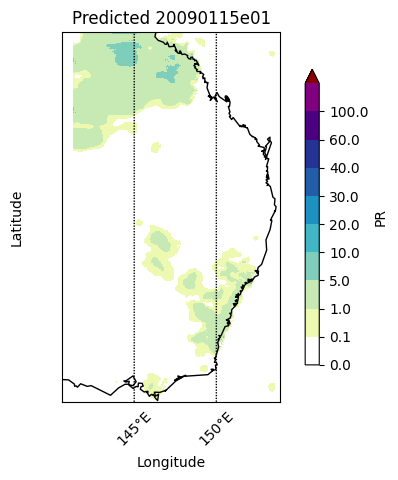

In [19]:
path = "/scratch/iu60/yl3101/DESRGAN/model_G_i000007/e01/2009-01-15_e01.nc"
data = xr.open_dataset(path)
data = data.fillna(0)
result = data.isel(time=0)['pr'].values
lat = data.lat.values
lon = data.lon.values
draw_aus_pr(result,lat=lat,lon=lon, title = "Predicted 20090115e01",save=False, \
                path="./comparison/20090101/AWAP_data/AWAP_20090101.jpeg")

(413, 267) (413, 267)


/scratch/zv2/yl3101/tmp/ipykernel_1443283/1803124947.py:155: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cs = map.pcolormesh(x, y, data, norm = norm, cmap = colormap)


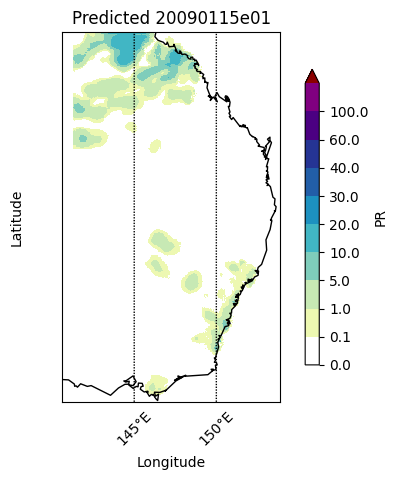

In [18]:
path = "/scratch/iu60/yl3101/DESRGAN/model_G_i000008/e01/2009-01-15_e01.nc"
data = xr.open_dataset(path)
data = data.fillna(0)
result = data.isel(time=0)['pr'].values
lat = data.lat.values
lon = data.lon.values
draw_aus_pr(result,lat=lat,lon=lon, title = "Predicted 20090115e01",save=False, \
                path="./comparison/20090101/AWAP_data/AWAP_20090101.jpeg")